## Prostate Cancer Screening Test Simulation

### Introduction

This Jupyter Notebook simulates a screening test for **clinically significant prostate cancer** using synthetic data that serves to mimic machine derived probabilities. The goal is to explore how varying decision thresholds can impact the performance of a prostate cancer screening test. Specifically, we simulate the results of a fictitious logistic regression model and analyze how well it can differentiate between healthy individuals, those with indolent prostate cancer, and those with clinically significant prostate cancer that requires treatment. By adjusting the thresholds and evaluating various metrics, we aim to better understand the trade-offs between Sensitivity( TP/ TP+ FN) or the  "True Postive Rate" , Specificity (TN/ TN +FP) the "True Negative Rate"  and Precision** (TP/ TP + FP) (Positive Prediction Accuracy). 

I will search for the most optimal F1 Score, the harmonic mean of Precision and Recall (Sensitivity), combining them into a single score to measure the balance between them. The F1 Score is particularly useful when you need to balance false positives and false negatives, and you want a single metric that accounts for both Precision and Recall.The formula for the F1 Score is 2 (Precision X Recall)/ (Precision + Recall). In this project I will demonstrate that for the given imbalanced dataset a classifucation threshold of 0.6 proved to produce the optimal F1 score of 0.92. 

Additionally I will evaluate the ROC Curve and the AUC: The ROC curve plots the true positive rate, AKA Sensiivity (TP/ TP + FN) rate against the false positive rate (FP/ FP + TN) at different thresholds.The ROC curve (Receiver Operating Characteristic) is a graphical representation of a classifier's performance across different thresholds.The ROC curve shows the trade-off between Sensitivity and Specificity (which is the complement of False Positive Rate as the classification threshold is varied. A lower threshold tends to classify more instances as positive, increasing sensitivity but also increasing the number of false positives which serves to lower specificity. A higher threshold tends to classify fewer instances as positive, reducing sensitivity but also reducing the number of false positives and thus increasing specificity. 

The best possible ROC curve would rise steeply towards the top-left corner (indicating high sensitivity with low false positives) and flatten out at the top, indicating that the classifier is almost perfect. A random classifier (50% guessing) produces a diagonal line from the bottom-left to the top-right, which means the classifier is making random guesses with no real discriminatory power.

The AUC (Area Under the Curve) summarizes the overall performance of the test. The AUC is a single scalar value that summarizes the overall performance of the classifier across all possible thresholds. The AUC is essentially the area under the ROC curve.AUC values range from 0 to 1:
AUC = 1.0: A perfect classifier.
AUC = 0.5: A random classifier (no predictive ability, similar to guessing).
AUC < 0.5: Worse than random guessing, meaning the model is likely predicting the wrong class.

The AUC can be intuitively understood as the likelihood that the classifier will rank a randomly chosen positive instance higher than a randomly chosen negative instance. An AUC of 0.97, for example, means there is a 97% chance that a randomly selected positive instance will be ranked higher than a negative instance by the classifier.



### Scenario Breakdown

We are simulating a population of **1000 men** over the age of 65. Out of these men:
- **370 men** have **histological evidence** of prostate cancer (diagnosed through biopsy).
  - Of these 370 men, **277 have clinically significant prostate cancer** (requiring treatment).
  - The remaining **93 men have indolent prostate cancer** (which may not require treatment).
- The other **630 men** are **healthy**, meaning they do not have prostate cancer.

This means the positive class represents only 27.7% of the dataset, while the negative class represents 72.3%. This class distribution is not equal and would typically be classified as an imbalanced dataset.

### Key Concepts and Definitions

#### 1. **Clinically Significant Prostate Cancer**
Clinically significant prostate cancer refers to cancer that requires treatment due to its potential to grow and cause harm. In this simulation, **277 men** have clinically significant prostate cancer. These men are our "true positives," meaning they should be correctly identified by the screening test. These men are assigned a **true label of 1**.

#### 2. **Indolent Prostate Cancer**
Indolent prostate cancer refers to prostate cancer that is slow-growing and may not require immediate treatment or any treatment at all. While these men have prostate cancer, it is **not clinically significant**. For the purposes of this test, they are treated similarly to healthy individuals because the screening test is focused on detecting **clinically significant cancer**. These men are assigned a **true label of 0**.

#### 3. **Healthy Individuals**
Healthy individuals do not have any form of prostate cancer. The screening test should ideally classify all healthy men as negative for prostate cancer. These men are assigned a **true label of 0**.

### Simulated Process

1. **Assigning Probabilities**: 
   Each individual in the population will be assigned a probability (between 0 and 1) that represents the likelihood of testing positive for clinically significant prostate cancer. 
   - **Clinically significant cancer**: Men with clinically significant cancer are assigned high probabilities.
   - **Indolent cancer**: Men with indolent cancer are assigned moderate probabilities.
   - **Healthy men**: Healthy men are assigned low probabilities.

2. **Assigning True Labels**: 
   True labels represent the actual condition of each individual:
   - **1** for men with clinically significant prostate cancer.
   - **0** for men with indolent prostate cancer and healthy men.

3. **Shuffling the Data**: 
   After assigning probabilities and true labels, the data is shuffled to mimic a real-world scenario where we do not know ahead of time which individuals have cancer.

4. **Applying Thresholds**: 
   Thresholds are applied to the predicted probabilities to classify individuals as **positive** or **negative** for clinically significant prostate cancer. For example:
   - A threshold of **0.5** means that any probability ≥ 0.5 will be classified as positive (indicating clinically significant cancer).
   - A threshold of **0.7** applies a stricter cutoff, meaning only individuals with probabilities ≥ 0.7 are classified as positive.

5. **Evaluating the Screening Test**: 
   The screening test is evaluated using the following key metrics:
   - **Sensitivity (Recall)**: Measures how many true positive cases are correctly identified.
   - **Specificity**: Measures how many true negative cases are correctly identified.
   - **Precision**: Measures how many predicted positive cases are actually positive.
   - **F1 Score**: The harmonic mean of Precision and Recall, balancing both metrics.
   - **ROC Curve and AUC**: The ROC curve plots the true positive rate against the false positive rate at different thresholds, and the AUC (Area Under the Curve) summarizes the overall performance of the test.

By running this simulation, we can observe how the screening test performs across different thresholds and evaluate its ability to detect clinically significant prostate cancer in the unbalanced dataset as described above. 


## Prostate Cancer Screening Test Simulation - Project Plan Outline

### 1. **Import Necessary Libraries**
   We will import the following libraries:
   - **`numpy`**: For generating synthetic data and handling arrays.
   - **`matplotlib`**: For plotting graphs such as the ROC curve and threshold performance.
   - **`sklearn.metrics`**: For calculating performance metrics like Sensitivity, Specificity, Precision, F1 Score, and the ROC curve.

### 2. **Simulate the Population**
   We will simulate a population of **1000 men** over the age of 65, with the following subgroups:
   - **370 men** have histological evidence of prostate cancer.
     - **277 men** have **clinically significant prostate cancer** (requiring treatment).
     - **93 men** have **indolent prostate cancer** (not requiring treatment).
   - The remaining **630 men** are healthy and do not have prostate cancer.

### 3. **Assign Probabilities**
   Each individual will be assigned a probability (a number between 0 and 1) representing the likelihood of testing positive for clinically significant prostate cancer:
   - **Clinically significant cancer**:(0.6 - 0.95)
   - **Indolent cancer**: These individuals should have moderate probabilities.(0.4- 0.75)
   - **Healthy men**: These individuals should have low probabilities .(0- 0.6)

### 4. **Assign True Labels**
   True labels will be assigned to each individual, representing their actual condition:
   - **1** for men with **clinically significant prostate cancer**.
   - **0** for men with **indolent prostate cancer** and for **healthy men**.

### 5. **Shuffle the Data**
   After assigning probabilities and true labels, we will combine the data into a single dataset and shuffle it. Shuffling ensures that the data is mixed, mimicking a real-world scenario where we don’t know ahead of time which individuals belong to which group.

### 6. **Apply Thresholds**
   We will apply thresholds to the predicted probabilities to classify individuals as either positive or negative for clinically significant prostate cancer.
   - Example thresholds:
     - A threshold of **0.5** means that any probability greater than or equal to 0.5 will be classified as positive (indicating clinically significant cancer).
     - A threshold of **0.7** applies a stricter cutoff, meaning only individuals with probabilities greater than or equal to 0.7 will be classified as positive.

### 7. **Evaluate the Screening Test**
   We will evaluate the performance of the screening test using several key metrics:
   - **Sensitivity (Recall)**: Measures how many true positive cases are correctly identified.
   - **Specificity**: Measures how many true negative cases are correctly identified.
   - **Precision**: Measures how many predicted positive cases are actually positive.
   - **F1 Score**: The harmonic mean of Precision and Recall.
   - **ROC Curve and AUC**: The ROC curve plots the true positive rate against the false positive rate at different thresholds, and the AUC (Area Under the Curve) provides a summary of the overall performance.

### 8. **Visualize Results**
   Finally, we will visualize the performance of the screening test using:
   - **ROC Curve**: A plot of true positive rate (Sensitivity) vs. false positive rate (1 - Specificity).
   
   - **Threshold Performance Plot**: A plot showing how metrics like Sensitivity, Specificity, Precision, and F1 Score change as we adjust the threshold. The plot will allow us to visually compare how the trade-offs between sensitivity, specificity, precision, and F1 Score shift as you change the threshold. As the threshold increases, sensitivity will generally decrease (you catch fewer true positives), but specificity and precision may increase (fewer false positives). The F1 Score will vary depending on the balance between precision and recall. We will generate thresholds from 0.0 to 1.0 is to cover the full range of possible decision thresholds. This allows us to observe how the model's performance changes from extreme cases (classifying everything as positive or negative) to more balanced thresholds.


In [76]:
# Import necessary libraries

import numpy as np  # For generating synthetic data and handling arrays
import matplotlib.pyplot as plt  # For plotting graphs (ROC curve, metrics visualization)
from sklearn.metrics import (confusion_matrix, precision_score, recall_score, 
                             f1_score, roc_curve, auc)  # For calculating evaluation metrics


In [77]:
# Step 1: Define the population size and subgroups
n_population = 1000  # Total population of men over the age of 65
n_prostate_cancer = 370  # Men with histological evidence of prostate cancer
n_clinically_significant = 277  # Men with clinically significant prostate cancer
n_indolent = n_prostate_cancer - n_clinically_significant  # Men with indolent prostate cancer
n_healthy = n_population - n_prostate_cancer  # Men without prostate cancer (healthy)

# Step 2: Perform a check to ensure the population breakdown is accurate
print(f"Total population: {n_population}")
print(f"Men with prostate cancer: {n_prostate_cancer}")
print(f"Clinically significant prostate cancer: {n_clinically_significant}")
print(f"Indolent prostate cancer: {n_indolent}")
print(f"Healthy individuals: {n_healthy}")


Total population: 1000
Men with prostate cancer: 370
Clinically significant prostate cancer: 277
Indolent prostate cancer: 93
Healthy individuals: 630


In [78]:
# Step 3: Assign probabilities for each group

# Clinically significant cancer - probabilities between 0.60 and 0.95
clinically_significant_probabilities = np.random.uniform(0.60, 0.95, n_clinically_significant)

# Indolent cancer - probabilities between 0.40 and 0.70
indolent_probabilities = np.random.uniform(0.40, 0.75, n_indolent)

# Healthy individuals - probabilities between 0.0 and 0.50
healthy_probabilities = np.random.uniform(0.0, 0.6, n_healthy)

# Step 4: Combine the probabilities into a single array
probabilities = np.concatenate([clinically_significant_probabilities, indolent_probabilities, healthy_probabilities])

# Step 5: Verify that the probability ranges for each group are correct by printing the summary statistics
print("Clinically significant cancer probabilities:")
print(pd.Series(clinically_significant_probabilities).describe())

print("\nIndolent cancer probabilities:")
print(pd.Series(indolent_probabilities).describe())

print("\nHealthy individuals probabilities:")
print(pd.Series(healthy_probabilities).describe())


Clinically significant cancer probabilities:
count    277.000000
mean       0.770975
std        0.099751
min        0.601621
25%        0.681274
50%        0.770601
75%        0.857755
max        0.948906
dtype: float64

Indolent cancer probabilities:
count    93.000000
mean      0.585470
std       0.108547
min       0.406256
25%       0.487384
50%       0.589665
75%       0.682296
max       0.749277
dtype: float64

Healthy individuals probabilities:
count    630.000000
mean       0.305631
std        0.174665
min        0.002964
25%        0.145443
50%        0.311657
75%        0.454954
max        0.599648
dtype: float64


In [79]:
# Step 4: Assign true labels

# True label = 1 for men with clinically significant prostate cancer
true_labels_clinically_significant = np.ones(n_clinically_significant)  # 1 for clinically significant cancer

# True label = 0 for men with indolent cancer
true_labels_indolent = np.zeros(n_indolent)  # 0 for indolent cancer

# True label = 0 for healthy individuals
true_labels_healthy = np.zeros(n_healthy)  # 0 for healthy individuals

# Step 5: Combine true labels into a single array
true_labels = np.concatenate([true_labels_clinically_significant, true_labels_indolent, true_labels_healthy])

# Step 6: Verify that the true labels have been assigned correctly by checking the distribution of the labels
print("True Label Distribution:")
print(pd.Series(true_labels).value_counts())


True Label Distribution:
0.0    723
1.0    277
Name: count, dtype: int64


In [80]:
# Step 5: Combine the probabilities and true labels into a single DataFrame
population_df = pd.DataFrame({
    'Probability': probabilities,
    'True Label': true_labels
})

# Step 6: Shuffle the DataFrame to mix the data
np.random.seed(42)  # Set seed for reproducibility
population_df = population_df.sample(frac=1).reset_index(drop=True)

# Step 7: Verify that the data was shuffled and integrity is maintained
print(population_df.head())  # Check the first few rows
print("\nData Integrity Check:")
print("True Label Distribution:")
print(population_df['True Label'].value_counts())

print("\nProbability Distribution:")
print(population_df['Probability'].describe())


   Probability  True Label
0     0.238557         0.0
1     0.403561         0.0
2     0.106290         0.0
3     0.078941         0.0
4     0.054892         0.0

Data Integrity Check:
True Label Distribution:
True Label
0.0    723
1.0    277
Name: count, dtype: int64

Probability Distribution:
count    1000.000000
mean        0.460556
std         0.257585
min         0.002964
25%         0.249944
50%         0.467829
75%         0.663588
max         0.948906
Name: Probability, dtype: float64


In [81]:
# Apply a threshold of 0.5
population_df['Prediction_0.5'] = (population_df['Probability'] >= 0.5).astype(int)

# Apply a threshold of 0.7
population_df['Prediction_0.7'] = (population_df['Probability'] >= 0.7).astype(int)

# Verify the data integrity and check the first few rows
print("First 5 rows after applying thresholds:")
print(population_df.head())

# Check how many individuals are classified as positive for each threshold
print("\nThreshold 0.5 - Prediction Distribution:")
print(population_df['Prediction_0.5'].value_counts())

print("\nThreshold 0.7 - Prediction Distribution:")
print(population_df['Prediction_0.7'].value_counts())


First 5 rows after applying thresholds:
   Probability  True Label  Prediction_0.5  Prediction_0.7
0     0.238557         0.0               0               0
1     0.403561         0.0               0               0
2     0.106290         0.0               0               0
3     0.078941         0.0               0               0
4     0.054892         0.0               0               0

Threshold 0.5 - Prediction Distribution:
Prediction_0.5
0    546
1    454
Name: count, dtype: int64

Threshold 0.7 - Prediction Distribution:
Prediction_0.7
0    788
1    212
Name: count, dtype: int64


In [85]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Function to evaluate and show metrics with simplified output
def evaluate_model_simplified(true_labels, predicted_labels, threshold_label):
    # Confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    
    # Extract values from the confusion matrix in the correct format (TN, FP, FN, TP)
    tn, fp, fn, tp = cm.ravel()
    
    # Display confusion matrix explicitly in the desired format
    print(f"\nConfusion Matrix for Threshold {threshold_label} (left to right: +,-, top to bottom: +,-):")
    print(f"[[TP = {tp}  FP = {fp}]\n [FN = {fn}  TN = {tn}]]\n")
    
    # Calculate and display metrics
    accuracy = accuracy_score(true_labels, predicted_labels)
    sensitivity = recall_score(true_labels, predicted_labels)  # Sensitivity = Recall
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # Avoid division by zero
    precision = precision_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Sensitivity (Recall): {sensitivity:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"F1 Score: {f1:.2f}")
    
# Example: Use this function with the predictions and true labels from the DataFrame
evaluate_model_simplified(population_df['True Label'], population_df['Prediction_0.5'], "0.5")
evaluate_model_simplified(population_df['True Label'], population_df['Prediction_0.7'], "0.7")



Confusion Matrix for Threshold 0.5 (left to right: +,-, top to bottom: +,-):
[[TP = 277  FP = 177]
 [FN = 0  TN = 546]]

Accuracy: 0.82
Sensitivity (Recall): 1.00
Specificity: 0.76
Precision: 0.61
F1 Score: 0.76

Confusion Matrix for Threshold 0.7 (left to right: +,-, top to bottom: +,-):
[[TP = 193  FP = 19]
 [FN = 84  TN = 704]]

Accuracy: 0.90
Sensitivity (Recall): 0.70
Specificity: 0.97
Precision: 0.91
F1 Score: 0.79


In [86]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Function to evaluate and show metrics with simplified output
def evaluate_model_simplified(true_labels, probabilities, threshold, threshold_label):
    # Apply the threshold to the predicted probabilities
    predicted_labels = (probabilities >= threshold).astype(int)
    
    # Confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    
    # Extract values from the confusion matrix in the correct format (TN, FP, FN, TP)
    tn, fp, fn, tp = cm.ravel()
    
    # Display confusion matrix explicitly in the desired format
    print(f"\nConfusion Matrix for Threshold {threshold_label} (left to right: +,-, top to bottom: +,-):")
    print(f"[[TP = {tp}  FP = {fp}]\n [FN = {fn}  TN = {tn}]]\n")
    
    # Calculate and display metrics
    accuracy = accuracy_score(true_labels, predicted_labels)
    sensitivity = recall_score(true_labels, predicted_labels)  # Sensitivity = Recall
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # Avoid division by zero
    precision = precision_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Sensitivity (Recall): {sensitivity:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"F1 Score: {f1:.2f}")

# Example: Running evaluation for thresholds 0.6, 0.65, and 0.75
thresholds = [0.6, 0.65, 0.75]
for t in thresholds:
    evaluate_model_simplified(population_df['True Label'], population_df['Probability'], t, str(t))



Confusion Matrix for Threshold 0.6 (left to right: +,-, top to bottom: +,-):
[[TP = 277  FP = 45]
 [FN = 0  TN = 678]]

Accuracy: 0.95
Sensitivity (Recall): 1.00
Specificity: 0.94
Precision: 0.86
F1 Score: 0.92

Confusion Matrix for Threshold 0.65 (left to right: +,-, top to bottom: +,-):
[[TP = 239  FP = 33]
 [FN = 38  TN = 690]]

Accuracy: 0.93
Sensitivity (Recall): 0.86
Specificity: 0.95
Precision: 0.88
F1 Score: 0.87

Confusion Matrix for Threshold 0.75 (left to right: +,-, top to bottom: +,-):
[[TP = 151  FP = 0]
 [FN = 126  TN = 723]]

Accuracy: 0.87
Sensitivity (Recall): 0.55
Specificity: 1.00
Precision: 1.00
F1 Score: 0.71


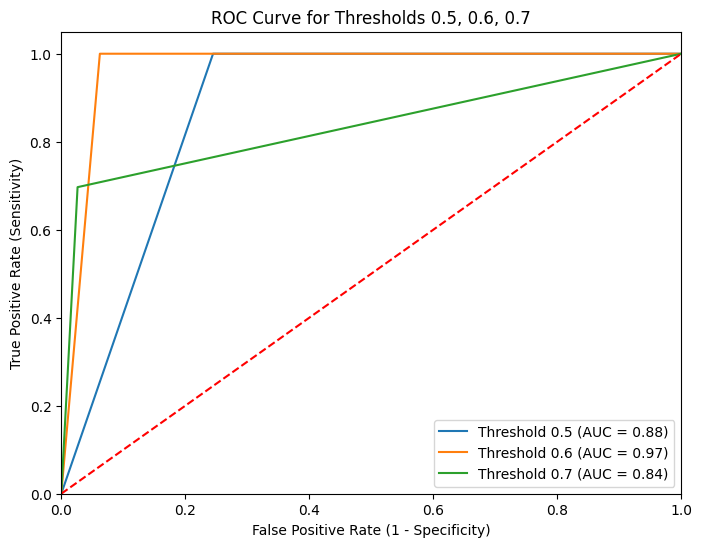

In [88]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Function to plot ROC Curve and calculate AUC for a specific threshold
def plot_roc_curve(true_labels, probabilities, threshold_values):
    plt.figure(figsize=(8, 6))
    
    for threshold in threshold_values:
        # Get the predicted labels for the given threshold
        predicted_labels = (probabilities >= threshold).astype(int)
        
        # Compute False Positive Rate and True Positive Rate
        fpr, tpr, _ = roc_curve(true_labels, predicted_labels)
        
        # Compute AUC
        roc_auc = auc(fpr, tpr)
        
        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'Threshold {threshold} (AUC = {roc_auc:.2f})')
    
    # Plot the 50% random classifier baseline
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    
    # Customize the plot
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('ROC Curve for Thresholds 0.5, 0.6, 0.7')
    plt.legend(loc="lower right")
    
    # Show the plot
    plt.show()

# Example: Running the ROC and AUC analysis for thresholds 0.5, 0.6, and 0.7
thresholds = [0.5, 0.6, 0.7]
plot_roc_curve(population_df['True Label'], population_df['Probability'], thresholds)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


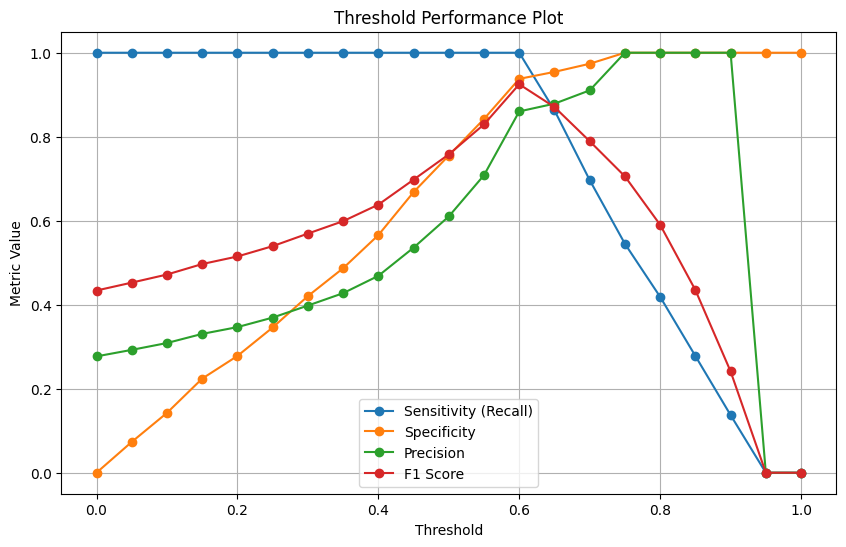

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Function to calculate metrics across a range of thresholds
def threshold_performance_plot(true_labels, probabilities):
    thresholds = np.arange(0.0, 1.05, 0.05)  # Thresholds from 0 to 1, step by 0.05
    sensitivities = []
    specificities = []
    precisions = []
    f1_scores = []
    
    for threshold in thresholds:
        predicted_labels = (probabilities >= threshold).astype(int)
        
        # Confusion matrix values
        tn, fp, fn, tp = confusion_matrix(true_labels, predicted_labels).ravel()
        
        # Sensitivity (Recall)
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        sensitivities.append(sensitivity)
        
        # Specificity
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        specificities.append(specificity)
        
        # Precision
        precision = precision_score(true_labels, predicted_labels)
        precisions.append(precision)
        
        # F1 Score
        f1 = f1_score(true_labels, predicted_labels)
        f1_scores.append(f1)
    
    # Plotting the metrics
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, sensitivities, label='Sensitivity (Recall)', marker='o')
    plt.plot(thresholds, specificities, label='Specificity', marker='o')
    plt.plot(thresholds, precisions, label='Precision', marker='o')
    plt.plot(thresholds, f1_scores, label='F1 Score', marker='o')
    
    # Labels and title
    plt.xlabel('Threshold')
    plt.ylabel('Metric Value')
    plt.title('Threshold Performance Plot')
    plt.legend(loc='best')
    plt.grid(True)
    
    # Show the plot
    plt.show()

# Running the threshold performance plot
threshold_performance_plot(population_df['True Label'], population_df['Probability'])


## Conclusion

This project simulated a prostate cancer screening test to evaluate how varying thresholds impact the ability of the model to correctly classify clinically significant prostate cancer. By adjusting the decision thresholds, we aimed to understand the trade-offs between **Sensitivity (Recall)**, **Specificity**, **Precision**, and the overall **F1 Score**.

### Key Findings:

1. **Optimal F1 Score at Threshold 0.6**:
   - The best **F1 Score** of **0.92** was achieved at a threshold of **0.6**, which provided a strong balance between Precision and Recall. 
   - At this threshold, the confusion matrix was as follows:
     ```
     Confusion Matrix for Threshold 0.6 (left to right: +,-, top to bottom: +,-):
     [[TP = 277  FP = 45]
      [FN = 0  TN = 678]]
     ```
     - **Accuracy**: 0.95
     - **Sensitivity (Recall)**: 1.00
     - **Specificity**: 0.94
     - **Precision**: 0.86
     - **F1 Score**: 0.92
   
   The **Sensitivity** at this threshold was perfect (1.00), meaning that all true positive cases (clinically significant prostate cancer) were correctly identified. This came at the cost of **45 false positives**, which slightly reduced Precision to **0.86**. However, the balance between Precision and Sensitivity led to an optimal **F1 Score** of **0.92**, indicating that this threshold offers a highly effective trade-off for this screening test.

2. **Threshold Performance Plot**:
   - The Threshold Performance Plot shows how **Sensitivity**, **Specificity**, **Precision**, and **F1 Score** change as we adjust the threshold from **0.0** to **1.0**.
   - At lower thresholds (0.0 to 0.4), **Sensitivity** remains high because the model classifies most instances as positive, but this results in low **Specificity** and **Precision** due to many false positives.
   - As the threshold increases, **Specificity** and **Precision** improve, peaking at around **0.6**, while **Sensitivity** gradually decreases.
   - Beyond **0.7**, **Sensitivity** drops significantly as the model becomes stricter, classifying fewer instances as positive. However, **Specificity** and **Precision** continue to rise, as fewer false positives are predicted.
   - **F1 Score** peaks around **0.6**, where the balance between catching true positives (Sensitivity) and minimizing false positives (Precision) is optimal.

3. **ROC Curve and AUC Analysis**:
   - The **ROC Curve** helped visualize the trade-off between Sensitivity and Specificity at various thresholds, showing the model's ability to distinguish between positive and negative cases.
   - The **AUC (Area Under the Curve)** of **0.97** indicates that the model is highly effective at separating clinically significant prostate cancer from healthy and indolent cases. This means the model has a **97% chance** of ranking a true positive higher than a false positive.
   
### Conclusion Summary:

By simulating this prostate cancer screening test, we demonstrated that the **0.6 threshold** provided the most balanced and effective screening performance, achieving an **F1 Score of 0.92**. This threshold captured all true positives while maintaining a reasonable level of false positives, making it a strong candidate for maximizing the screening test's effectiveness. The results from the **ROC curve** and **AUC** further supported this conclusion, showcasing the model's ability to perform well across a wide range of thresholds.


### Footnotes/ Dataset Description

This project simulates a population of **1000 men** over the age of 65, including probabilities of having clinically significant prostate cancer, indolent prostate cancer, or being healthy. The dataset contains the following structure:

- **370 men** have some form of prostate cancer (histological evidence):
  - **277 men** have **clinically significant prostate cancer** (requiring treatment).
  - **93 men** have **indolent prostate cancer** (which may not require treatment).
- **630 men** are **healthy**, with no evidence of prostate cancer.

#### 1. **Balanced vs. Imbalanced Dataset**:
- **Imbalanced Dataset**: 
  - The positive class (men with clinically significant prostate cancer) makes up only **27.7%** of the population (**277 out of 1000 men**). 
  - The remaining population (men with indolent prostate cancer or no cancer) comprises **72.3%** of the dataset, which creates an imbalance between the two main categories (positive and negative).
  - Imbalanced datasets like this can make it harder for machine learning models to correctly classify the minority class (clinically significant cancer), as the model may be biased toward predicting the majority class (healthy/indolent cancer).
  
#### 2. **Overlap in Probability Metrics Per Group**:
- **Clinically Significant Cancer**: 
  - Probabilities assigned between **0.60 and 0.95**, meaning men with clinically significant cancer have a high likelihood of testing positive.
- **Indolent Cancer**:
  - Probabilities assigned between **0.40 and 0.75**, introducing some overlap with the clinically significant cancer group (i.e., some men with indolent cancer may have probabilities close to those with clinically significant cancer, which can result in misclassification).
- **Healthy Individuals**:
  - Probabilities assigned between **0.0 and 0.60**, overlapping with the indolent group (and in rare cases, with the lower end of the clinically significant group).
  
**Implications of Overlap**:
  - **Overlap between Indolent and Clinically Significant Cancer**: The probability ranges for these two groups overlap between **0.60 and 0.75**, making it harder for the model to differentiate between indolent and clinically significant cases. This could lead to some false positives or false negatives in classification.
  - **Overlap between Healthy and Indolent Cancer**: Similarly, the overlap between **healthy** individuals and **indolent cancer** (probabilities between **0.40 and 0.60**) can also cause confusion in classification, potentially increasing the number of false positives (classifying healthy individuals as having cancer).

#### 3. **Expectations and Assumptions for Dataset Manageability/Optimization**:
- **Challenges with Imbalance**: 
  - Since the dataset is imbalanced, we expect challenges in optimizing the model for both **Sensitivity** (catching all positive cases) and **Specificity** (avoiding false positives). Models trained on imbalanced datasets tend to be biased toward predicting the majority class (healthy/indolent cancer), so managing false negatives for the minority class (clinically significant cancer) becomes a key optimization goal.
  
- **Optimization Focus**: 
  - Given the **probability overlap** between clinically significant, indolent, and healthy individuals, the key challenge is setting a **threshold** that can balance **sensitivity and precision**. For example, a threshold that is too low will increase false positives (classifying healthy men as having cancer), while a threshold that is too high will miss some clinically significant cases (false negatives).
  
- **Assumptions**: 
  - **Cost of False Negatives**: In a screening test for clinically significant prostate cancer, false negatives (missing someone who has clinically significant cancer) are considered more costly than false positives (misclassifying someone as having cancer when they do not). Thus, a threshold that prioritizes sensitivity (even at the cost of some false positives) may be preferred. (This aspect of metric considerations was not addressed in this project.)
  - **Manageability**: The dataset, despite being imbalanced, can be managed and optimized with techniques such as **ROC Curve analysis**, **Threshold Performance Evaluation**, and focusing on metrics like **F1 Score** to find a balanced approach that minimizes both false positives and false negatives.
